<a href="https://colab.research.google.com/github/sebagit914/Challenge01/blob/master/6_2_predicci%C3%B3n_de_precios_de_viviendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preguntas para pensar y responder
Una vez que hayas completado la tarea, responde las siguientes preguntas.

¿Cuáles son las características más importantes de tu modelo?


¿Qué otros parámetros podrías haber intentado ajustar?

In [ ]:
# mount data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import Train and Test
from sklearn.model_selection import train_test_split

# Import Bagged trees and random forest
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor




In [ ]:
#Cargar data

df = pd.read_csv('/content/drive/MyDrive/PTDataScience/PandasForDataManipulation/6º semana: Decision Tree & Rain Forest/6.2kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.index = df['id']
df.drop(columns = ['date', 'id'], inplace = True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Bagged Trees

Predecir precios usando arbol de decision

In [ ]:
X = df.drop(columns = 'price')
y = df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3)

In [ ]:
bt = BaggingRegressor()
bt.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [ ]:
#R2 Train
bt.score(X_train, y_train)

0.973303741127585

In [ ]:
#R2 Test
bt.score(X_test, y_test)

0.8710091166311509

# Random Forest

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
#R2 Train
rf.score(X_train, y_train)

0.9822372069536272

In [ ]:
#R2 Test
rf.score(X_test, y_test)

0.8831359455892721

¿Cuáles son las características más importantes de tu modelo?

Random Forest is better

In [ ]:
rf.feature_importances_

array([0.00291444, 0.00638791, 0.29793622, 0.01397414, 0.00221808,
       0.02342517, 0.01651911, 0.00268595, 0.29142689, 0.01871033,
       0.00573828, 0.02871147, 0.00211653, 0.0126752 , 0.16055115,
       0.0672165 , 0.03335977, 0.01343286])

<BarContainer object of 18 artists>

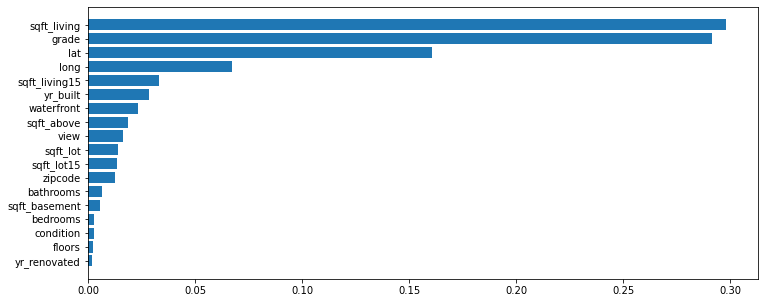

In [ ]:
rf_features = pd.DataFrame({'feature': X_train.columns, 'feature_importance': rf.feature_importances_})
rf_features.sort_values(by = 'feature_importance', inplace = True)

plt.figure(figsize= (12, 5))
plt.barh(rf_features['feature'], rf_features['feature_importance'])

¿Qué otros parámetros podrías haber intentado ajustar?

